In [0]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
((x_train, y_train), (x_test, y_test)) = load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
# x_test 有 10000張圖, 32 x 32大小 每張圖有3個像素通道(彩色)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
# cifar10的分類
trans = [
"airplane",       										
"automobile",										
"bird",										
"cat",										
"deer",										
"dog",										
"frog",										
"horse",										
"ship",										
"truck"
         
]

9


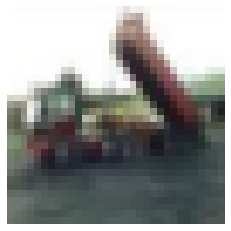

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 選哪一個函式判斷, 目前要判斷一張圖片裏面有多少種類東西, 各自東西獨立, 
idx = 2
print(y_train[idx][0])
plt.axis("off")
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
# 由於是 2D圖片, 因此用 conv2D, 及 Maxpooling2D
# 64個過濾器, kernel_size 過濾器大小 3 x 3, padding 外面層為了讓
# 64個過濾器, 每個過濾器有自己的及格分數(bias), 因此有 64 個 bias
# Maxpooling 預設值就是 2 x 2, 直接打 Maxpooling2D()即可
layers = [
    # 27(1 filter) * 64 + 64(bias) = 1792, 27是因為 3x3的過濾器 有RGB三顏色共27個 
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers=layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [0]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# SparseCategoricalCrossentropy 會自動做 one-hot encoding, 並且會再該做的時候做
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
# 只要除255, y_train 已經使用 sparse版本的one hot encoding
# 這邊不用把像素拉直成1D, 原因是在前面 Flatten 層就已經處理成 1D 像素只需要將數值標準化成 0~1 
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [11]:
# 開始訓練 沒使用GPU情況下 epochs=1 完成時間約 274s, GPU 約 8s
# callbacks 讓模型再最好的情況下停止, Modelcheckpoint 指把最好的參數存檔
# 存模型: model.save("xxx.h5")
# 讀取模型: model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks= [
            EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("cnn.h5", save_best_only=True)

]
model.fit(x_train_norm, y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 8s - loss: 1.1704 - accuracy: 0.5849 - val_loss: 1.0166 - val_accuracy: 0.6438
Epoch 2/100
225/225 - 8s - loss: 0.9597 - accuracy: 0.6634 - val_loss: 0.8499 - val_accuracy: 0.7016
Epoch 3/100
225/225 - 8s - loss: 0.8410 - accuracy: 0.7080 - val_loss: 0.8005 - val_accuracy: 0.7242
Epoch 4/100
225/225 - 8s - loss: 0.7280 - accuracy: 0.7444 - val_loss: 0.7134 - val_accuracy: 0.7522
Epoch 5/100
225/225 - 8s - loss: 0.6593 - accuracy: 0.7690 - val_loss: 0.7007 - val_accuracy: 0.7638
Epoch 6/100
225/225 - 8s - loss: 0.5834 - accuracy: 0.7954 - val_loss: 0.6597 - val_accuracy: 0.7778
Epoch 7/100
225/225 - 8s - loss: 0.5158 - accuracy: 0.8182 - val_loss: 0.6792 - val_accuracy: 0.7706
Epoch 8/100
225/225 - 8s - loss: 0.4547 - accuracy: 0.8406 - val_loss: 0.6856 - val_accuracy: 0.7708
Epoch 9/100
225/225 - 8s - loss: 0.3972 - accuracy: 0.8583 - val_loss: 0.6660 - val_accuracy: 0.7886


In [12]:
# 評估
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7105 - accuracy: 0.7568


[0.7104565501213074, 0.7567999958992004]

In [15]:
pre = model.predict_classes(x_test_norm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape)

[3 8 8 ... 5 1 7]


In [19]:
# 
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_reshape, pre)
c = ["{}(預測)".format(i) for i in trans]
i = ["{}(真實)".format(i) for i in trans]
pd.DataFrame(mat, columns=c, index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),819,10,56,12,17,8,7,10,31,30
automobile(真實),14,861,6,11,2,4,1,4,15,82
bird(真實),59,4,680,50,83,48,34,29,9,4
cat(真實),21,4,92,589,57,151,39,25,10,12
deer(真實),23,3,74,56,738,27,24,47,6,2
dog(真實),10,3,65,151,33,668,15,41,7,7
frog(真實),4,5,47,55,45,27,801,7,2,7
horse(真實),12,3,45,30,57,50,5,789,0,9
ship(真實),100,26,16,17,3,5,6,4,797,26
truck(真實),35,56,16,19,2,8,6,16,16,826


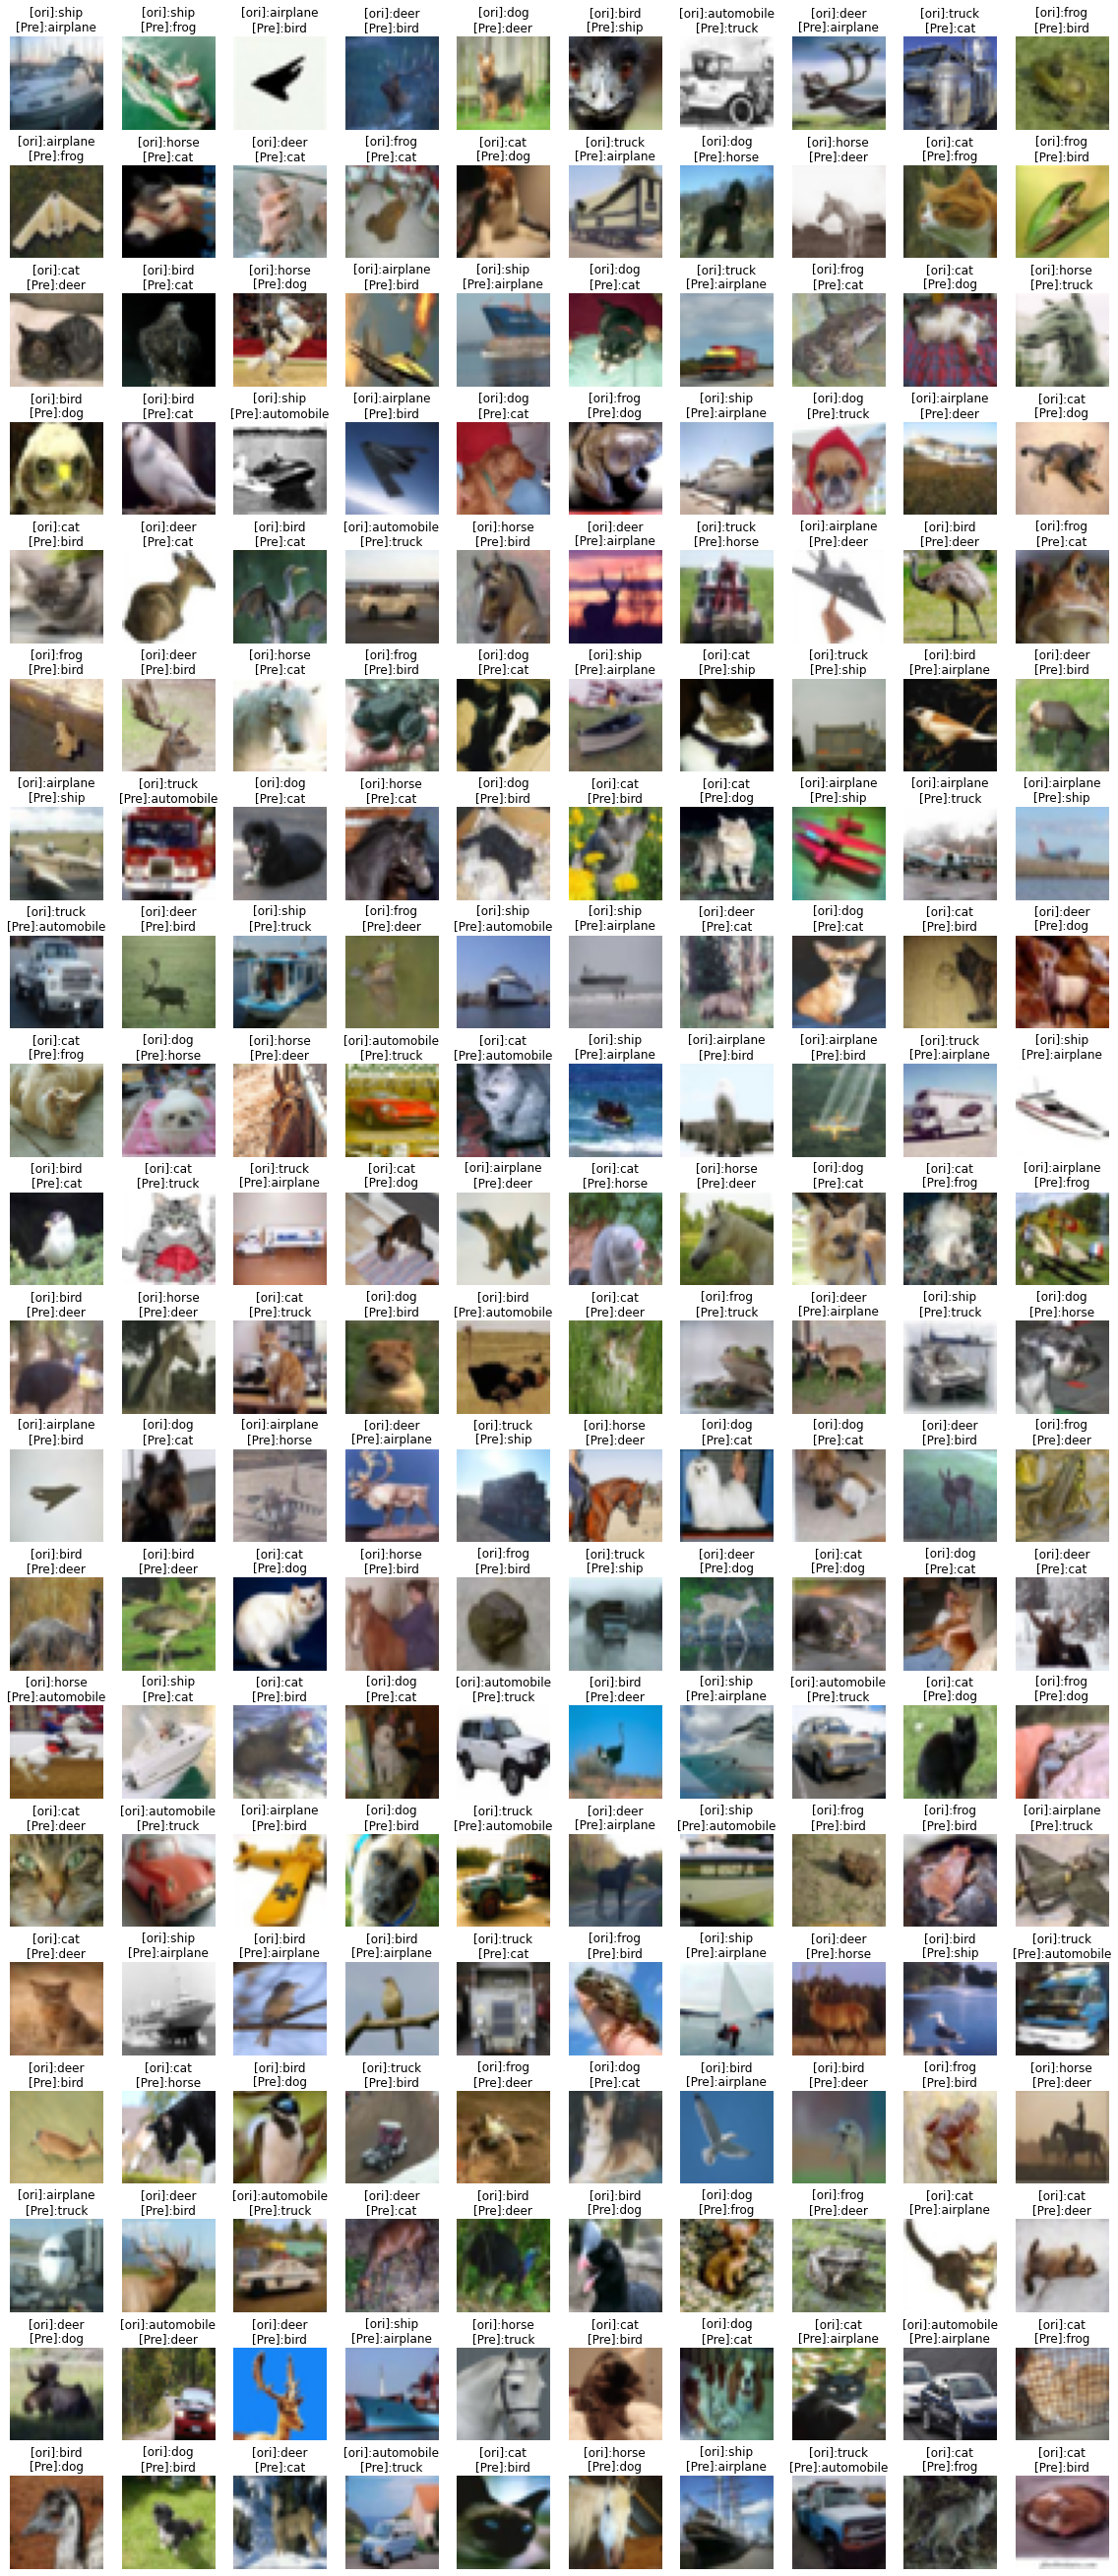

In [24]:
import numpy as np
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test_reshape[idx]
false_predict = pre[idx]
#把圖變大
plt.figure(figsize=(20, 50))
width = 10
height = len(false_img) // width +1
for i, img in enumerate(false_img):
  plt.subplot(height, width, i+1)
  plt.axis("off")
  t = "[ori]:{}\n[Pre]:{}".format(trans[false_answer[i]], 
                                  trans[false_predict[i]])
  plt.title(t)
  plt.imshow(img)

In [0]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
#剛剛帶入時是 (10000, 784), 現在帶入(1, 784)
img_norm = np.arry(img).reshape(-1, 32, 32, 3) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", trans[ans])
plt.imshow(img)

In [26]:
# 儲存資料, 讀取資料, 延續上次的訓練進度繼續訓練
from tensorflow.keras.models import load_model
loaded = load_model("cnn.h5")
# 1. 可以直接做 predict, 2.直接做fit compile資料已經一並讀取這邊不用再 compile
loaded.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7105 - accuracy: 0.7568


[0.7104565501213074, 0.7567999958992004]